In [4]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [5]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [6]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [7]:
X = [x_set, f]

In [8]:
#확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
#x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

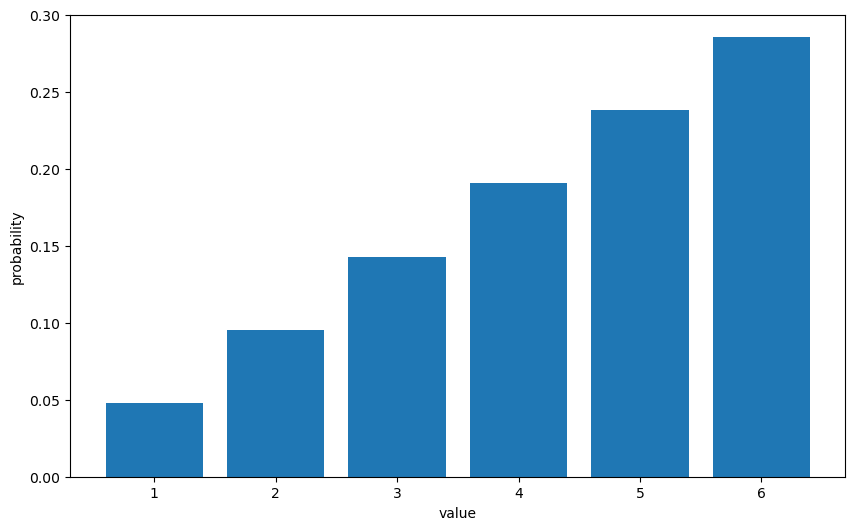

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [10]:
a = {'사과':1, '딸기':5, '귤':10}

In [11]:
a

{'사과': 1, '딸기': 5, '귤': 10}

In [12]:
a = {('초콜릿', 200):20, ('마카롱', 500):15, ('쿠키', 300):30}
a

{('초콜릿', 200): 20, ('마카롱', 500): 15, ('쿠키', 300): 30}

In [13]:
a = {'사과':1, '딸기':5, '귤':10}
v1 = a['딸기']
v1

5

In [14]:
v2=a['레몬']
v2

KeyError: '레몬'

In [15]:
f1 = '딸기' in a
f1

True

In [16]:
f2 = '레몬' not in a
f2

True

In [17]:
f3 = '레몬' in a
f3

False

In [18]:
v1 = a.get('딸기')
v1

5

In [19]:
v2 = a.get('레몬')
v2

In [20]:
a = {'초콜릿':1, '마카롱':2, '쿠키':3}
a['초콜릿'] = 'One'
a['마카롱'] = 'Two'
a['쿠키'] = 'Three'
a

{'초콜릿': 'One', '마카롱': 'Two', '쿠키': 'Three'}

In [21]:
d = dict(초콜릿 = 20, 마카롱 = 15, 쿠키 = 30)
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [22]:
key = ['초콜릿', '마카롱', '쿠키']
value = [20, 15, 30]
d = dict(zip(key, value))
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [23]:
d = dict([('초콜릿', 20), ('마카롱', 15), ('쿠키', 30)])
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [24]:
np.all(prob >= 0)

np.True_

In [25]:
np.sum(prob)

1.000

In [26]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [27]:
F(3)

0.286

In [28]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{np.int64(5): 0.048,
 np.int64(7): 0.095,
 np.int64(9): 0.143,
 np.int64(11): 0.190,
 np.int64(13): 0.238,
 np.int64(15): 0.286}

In [29]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [30]:
np.random.choice(5, 5, replace=False)

array([1, 2, 3, 0, 4], dtype=int32)

In [31]:
np.random.choice(5, 3, replace=False)

array([4, 3, 1], dtype=int32)

In [32]:
np.random.choice(5, 10)

array([3, 4, 2, 4, 2, 4, 0, 0, 3, 1], dtype=int32)

In [33]:
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 3, 0, 3, 3, 2, 3, 2, 3, 3], dtype=int32)

In [34]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332

In [35]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [36]:
E(X)

4.333

In [37]:
E(X, g=lambda x: 2*x + 3)

11.667

In [38]:
2 * E(X) +3

11.667

In [39]:
strings = ['hyeja', 'parkhyeja', 'youngtae', 'kimyoungtae', 'bbangtae']

In [40]:
strings.sort(key=lambda x: len(set(list(x))))

In [41]:
strings

['hyeja', 'bbangtae', 'parkhyeja', 'youngtae', 'kimyoungtae']

In [42]:
2 * E(X) + 3

11.667

In [43]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [44]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [45]:
V(X)

2.222

In [46]:
V(X, lambda x: 2*x + 3)

8.889

In [47]:
2**2 * V(X)

8.889

# 1.2. 2차원 이산형 확률분포

## 1.2.1. 2차원 이산형 확률분포의 정의

In [52]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [55]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1<= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [56]:
XY = [x_set, y_set, f_XY]

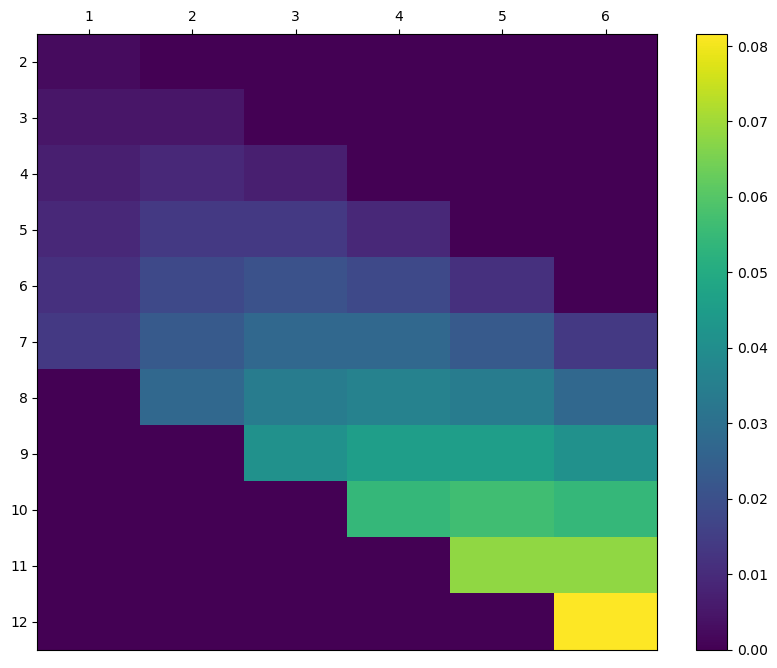

In [60]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [61]:
np.all(prob >= 0)

np.True_

In [62]:
np.sum(prob)

1.000

In [63]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [64]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [65]:
X = [x_set, f_X]
Y = [y_set, f_Y]

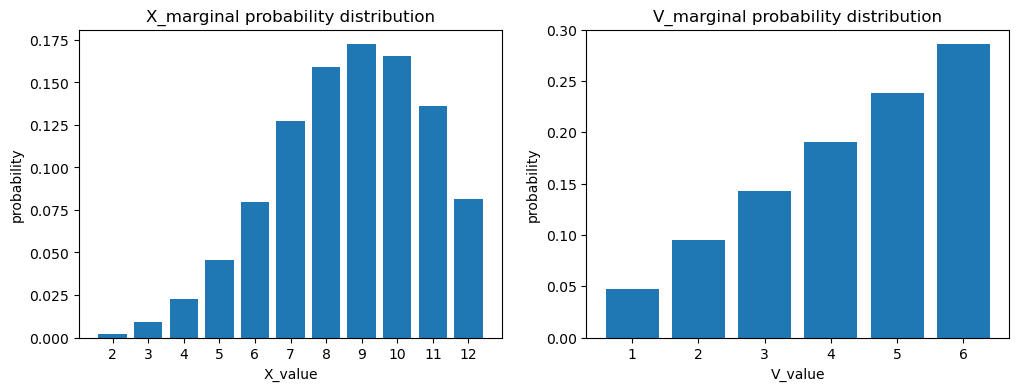

In [67]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('V_marginal probability distribution')
ax2.set_xlabel('V_value')
ax2.set_ylabel('probability')

plt.show()

In [68]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [69]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [70]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [71]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [72]:
a, b = 2, 3

In [73]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [74]:
a * mean_X + b * mean_Y

30.333

In [75]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [77]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [78]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [79]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

In [82]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [83]:
cov_xy = Cov(XY)
cov_xy

2.222

In [84]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [85]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [86]:
cov_xy / np.sqrt(var_X * var_Y)

0.707